<h2>Models to Predict  Population in  Countries of the World</h2>

<h2> By Michael Kumakech (Eng.) </h2>

<b> Import Libaries</b>

In [12]:
import requests
import lxml.html as lh
import pandas as pd

<b> Remove the website to be put in the notebook</b>

<b> Check the table headers</b>

In [13]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)' #assign the wiki page
#wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population'

page = requests.get(wiki_url) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [14]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country/Territory

2:UN continentalregion[4]

3:UN statisticalsubregion[4]

4:Population(1 July 2018)

5:Population(1 July 2019)

6:Change



<b> 
Check the data in other Row</b>

In [15]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> 
What about the numbers of rows and columns</b>

In [16]:
[len(C) for (title,C) in col]

[234, 234, 234, 234, 234, 234]

<b> 
Displays the data frame with three columns.</b>

In [17]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

<b> Population Estimates between the years 1950 and 1980 (in thousands)</b>

In [18]:
df.head()

,Country/Territory\n,UN continentalregion[4]\n,UN statisticalsubregion[4]\n,Population(1 July 2018)\n,Population(1 July 2019)\n,Change\n
0,China[a],Asia,Eastern Asia,"1,427,647,786","1,433,783,686",+0.43%\n
1,India,Asia,Southern Asia,"1,352,642,280","1,366,417,754",+1.02%\n
2,United States,Americas,Northern America,"327,096,265","329,064,917",+0.60%\n
3,Indonesia,Asia,South-eastern Asia,"267,670,543","270,625,568",+1.10%\n
4,Pakistan,Asia,Southern Asia,"212,228,286","216,565,318",+2.04%\n


In [69]:
df.tail()

,Country/Territory\n,UN continentalregion[4]\n,UN statisticalsubregion[4]\n,Population(1 July 2018)\n,Population(1 July 2019)\n,Change\n
229,Falkland Islands (United Kingdom),Americas,South America,"3,234","3,377",+4.42%\n
230,Niue (New Zealand),Oceania,Polynesia,"1,620","1,615",−0.31%\n
231,Tokelau (New Zealand),Oceania,Polynesia,"1,319","1,340",+1.59%\n
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%\n
233,World,,,"7,631,091,040","7,713,468,100",+1.08%\n


<h2> Clean the dataframe</h2>

In [70]:
import pandas as pd
import numpy as np

<b> Remove Row 233 with World toral Records</b>

In [71]:
# Delete row at index position 233
df2 = df.drop([df.index[233]])


In [72]:
df2.tail()

,Country/Territory\n,UN continentalregion[4]\n,UN statisticalsubregion[4]\n,Population(1 July 2018)\n,Population(1 July 2019)\n,Change\n
228,Montserrat (United Kingdom),Americas,Caribbean,"4,993","4,989",−0.08%\n
229,Falkland Islands (United Kingdom),Americas,South America,"3,234","3,377",+4.42%\n
230,Niue (New Zealand),Oceania,Polynesia,"1,620","1,615",−0.31%\n
231,Tokelau (New Zealand),Oceania,Polynesia,"1,319","1,340",+1.59%\n
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%\n


In [73]:
df2.describe()

,Country/Territory\n,UN continentalregion[4]\n,UN statisticalsubregion[4]\n,Population(1 July 2018)\n,Population(1 July 2019)\n,Change\n
count,233,233,233,233,233,233
unique,233,5,22,233,233,187
top,Paraguay,Africa,Caribbean,"627,809","1,179,551",+0.73%\n
freq,1,58,26,1,1,4


In [74]:
df2.dtypes

Country/Territory\n             object
UN continentalregion[4]\n       object
UN statisticalsubregion[4]\n    object
Population(1 July 2018)\n       object
Population(1 July 2019)\n       object
Change\n                        object
dtype: object

In [75]:
df2_ = df2[['Population(1 July 2018)\n', 'Population(1 July 2019)\n']]
#df22_ = df2_.replace('[^\d.]','', regex = True).astype(float)
df2_

,Population(1 July 2018)\n,Population(1 July 2019)\n
0,"1,427,647,786","1,433,783,686"
1,"1,352,642,280","1,366,417,754"
2,"327,096,265","329,064,917"
3,"267,670,543","270,625,568"
4,"212,228,286","216,565,318"
...,...,...
228,"4,993","4,989"
229,"3,234","3,377"
230,"1,620","1,615"
231,"1,319","1,340"


In [76]:
df22_ = df2_.replace('[^\d.]','', regex = True).astype(float)
df22_

,Population(1 July 2018)\n,Population(1 July 2019)\n
0,1.427648e+09,1.433784e+09
1,1.352642e+09,1.366418e+09
2,3.270963e+08,3.290649e+08
3,2.676705e+08,2.706256e+08
4,2.122283e+08,2.165653e+08
...,...,...
228,4.993000e+03,4.989000e+03
229,3.234000e+03,3.377000e+03
230,1.620000e+03,1.615000e+03
231,1.319000e+03,1.340000e+03


In [78]:

df22_.dtypes


Population(1 July 2018)\n    float64
Population(1 July 2019)\n    float64
dtype: object

In [79]:
df22_

,Population(1 July 2018)\n,Population(1 July 2019)\n
0,1.427648e+09,1.433784e+09
1,1.352642e+09,1.366418e+09
2,3.270963e+08,3.290649e+08
3,2.676705e+08,2.706256e+08
4,2.122283e+08,2.165653e+08
...,...,...
228,4.993000e+03,4.989000e+03
229,3.234000e+03,3.377000e+03
230,1.620000e+03,1.615000e+03
231,1.319000e+03,1.340000e+03


In [58]:
print("number of NaN values for the column Country :", df['Country/Territory\n'].isnull().sum())
print("number of NaN values for the column Population in 2018:", df['Population(1 July 2018)\n'].isnull().sum())
print("number of NaN values for the column Population in 2019 :", df['Population(1 July 2019)\n'].isnull().sum())
print("number of NaN values for the column Change :", df['Change\n'].isnull().sum())

number of NaN values for the column Country : 0
number of NaN values for the column Population in 2018: 0
number of NaN values for the column Population in 2019 : 0
number of NaN values for the column Change : 0


In [60]:
df.dtypes

Country/Territory\n             object
UN continentalregion[4]\n       object
UN statisticalsubregion[4]\n    object
Population(1 July 2018)\n       object
Population(1 July 2019)\n       object
Change\n                        object
dtype: object

In [80]:
df22_.describe()

,Population(1 July 2018)\n,Population(1 July 2019)\n
count,2.330000e+02,2.330000e+02
mean,3.273913e+07,3.309244e+07
std,1.337221e+08,1.347199e+08
min,8.010000e+02,7.990000e+02
25%,4.392480e+05,4.403720e+05
50%,5.453014e+06,5.457013e+06
75%,1.975147e+07,2.032138e+07
max,1.427648e+09,1.433784e+09


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 1518910144.6538002)

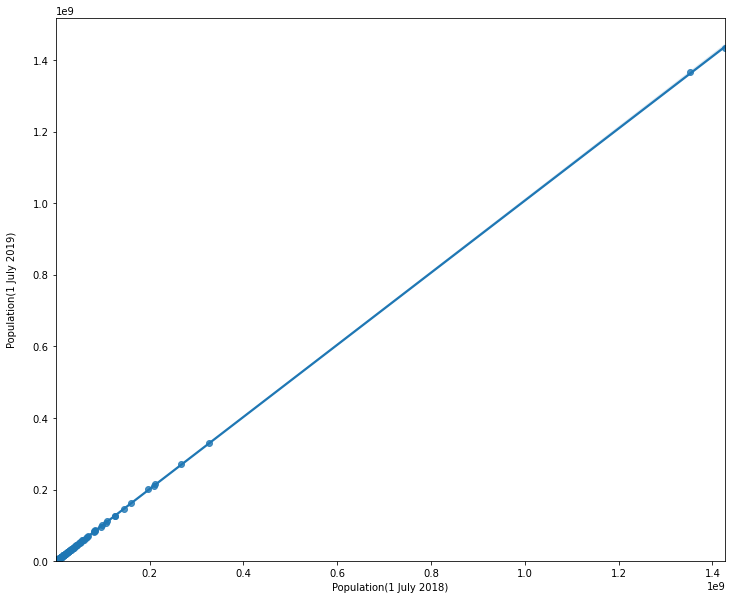

In [84]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Population(1 July 2018)\n", y="Population(1 July 2019)\n", data=df22_)
plt.ylim(0,)

In [86]:
df22_[["Population(1 July 2018)\n", "Population(1 July 2019)\n"]].corr()

,Population(1 July 2018)\n,Population(1 July 2019)\n
Population(1 July 2018)\n,1.000000,0.999991
Population(1 July 2019)\n,0.999991,1.000000


<h2> Model Development</h2>

In [88]:
#Import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
%matplotlib inline

<b> We can Fit a linear regression model using the Population(1 July 2018)  feature and caculate the R^2 for Population(1 July 2019)</b>

In [91]:
X = df22_[['Population(1 July 2018)\n']] 
Y = df22_['Population(1 July 2019)\n'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.999981282177034


<b>How could identified Population(1 July 2018) help us predict Population(1 July 2019)?</b>

In [92]:
X = df22_[['Population(1 July 2018)\n']] 
Y = df22_['Population(1 July 2019)\n'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

array([1.43839669e+09, 1.36283221e+09, 3.29643275e+08, 2.69774681e+08,
       2.13919239e+08])

<b> What is the value of the intercept ?</b>

In [93]:
lm.intercept_

109314.30204887688

<b> What is the value of the Slope ?</b>

In [94]:
lm.coef_

array([1.00745253])

<h2>What is the final estimated linear model we get?</h2>
As we saw above, we should get a final linear model with the structure:$$ Yhat = a + b X $$

Plugging in the actual values we get:

<h2>$$ Population(1  July  2019) = 109314 +  Population(1  July  2018) $$</h2>

<h2> Thank you for completing this notebook</h2>

<h2>About the Author:</h2> 


This notebook was written by Michael Kumakech. Michael Kumakech is an Instructor at Makerere University, College of Computing and Information Sciences and holds a Professional Certificate in IBM Data Science, a MSc in Data Communication and Software Engineering. His research focused on using Machine Learning, Deep Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Michael has been working for Makerere  University in Uganda since 2007.